In [180]:
import pandas as pd
import numpy as np
df=pd.read_excel("glass.xlsx",sheet_name="glass")


In [181]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [182]:
df.shape

(214, 10)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [184]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [185]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

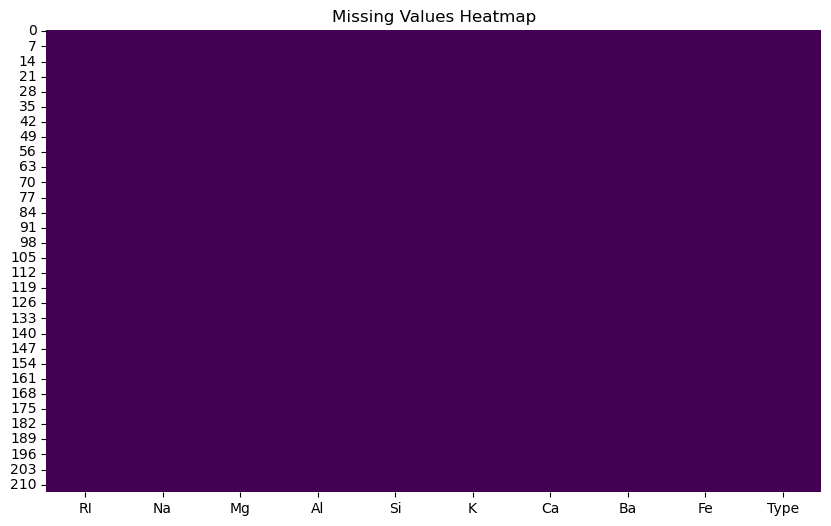

In [186]:
 #Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [187]:
df.isnull().sum().sum()

0

In [188]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [189]:
numeric_col=df.select_dtypes(include=['float64','int64']).columns
numeric_col

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [190]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index([], dtype='object')

<Figure size 1500x1200 with 0 Axes>

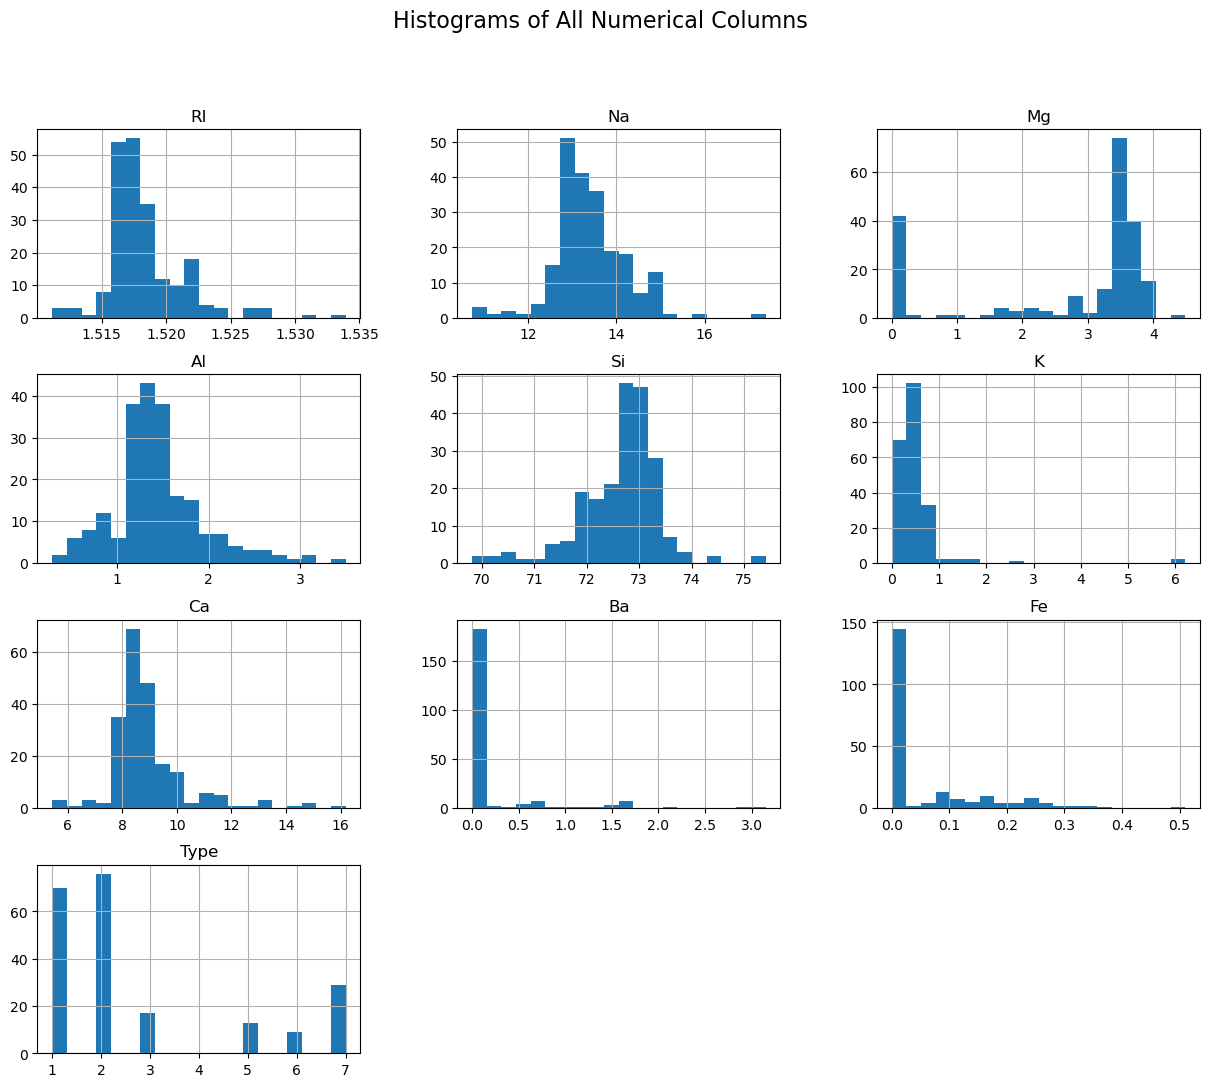

In [191]:

plt.figure(figsize=(15,12)) 
df[numeric_col].hist(bins=20, figsize=(15,12), layout=(4,3)) 
plt.suptitle("Histograms of All Numerical Columns", fontsize=16)
plt.show()

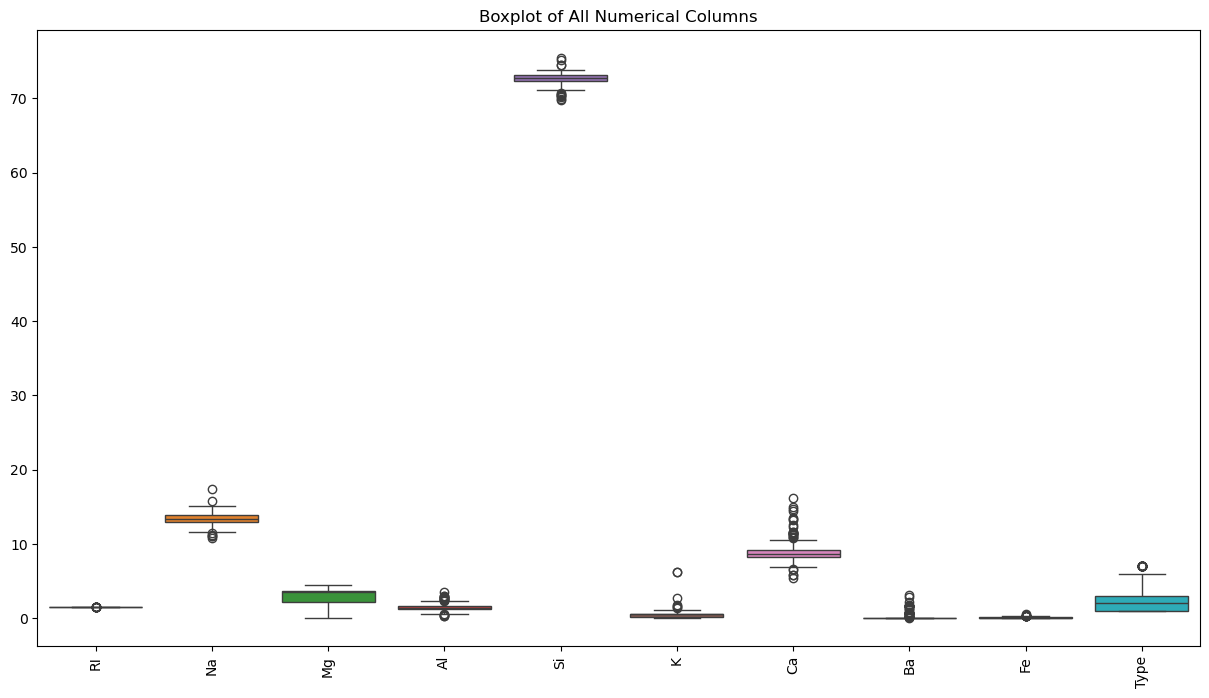

In [192]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_col])
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Columns") 
plt.show()

In [193]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Keep only values inside the range
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
   
print("Outliers removed successfully.")

Outliers removed successfully.


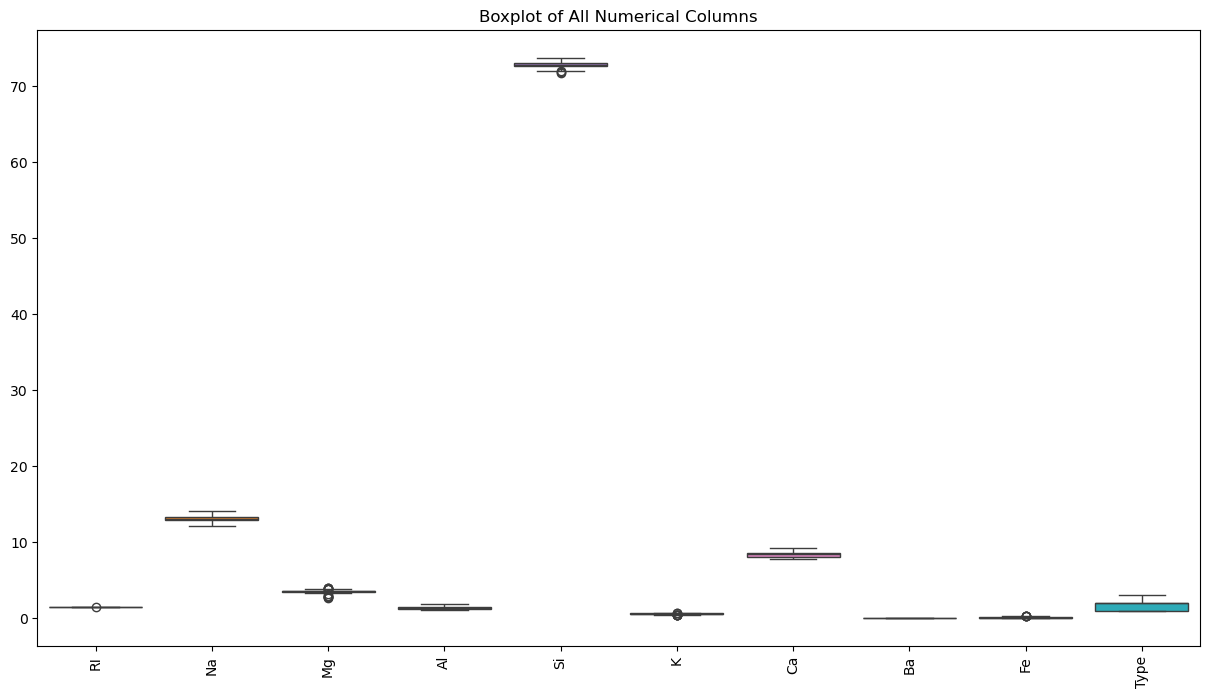

In [194]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_col])
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Columns") 
plt.show()

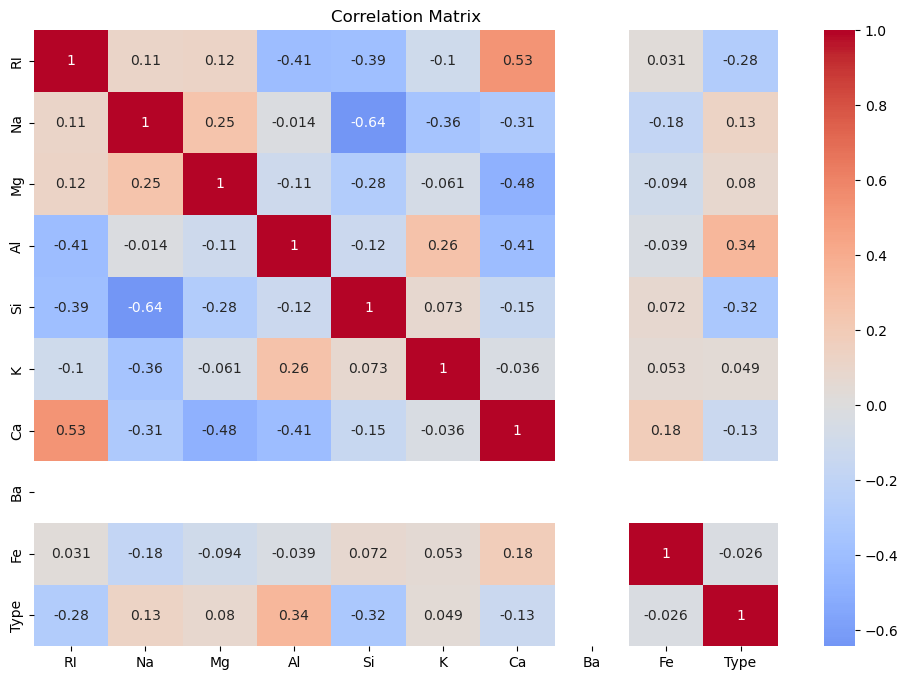

In [195]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df[numeric_col].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

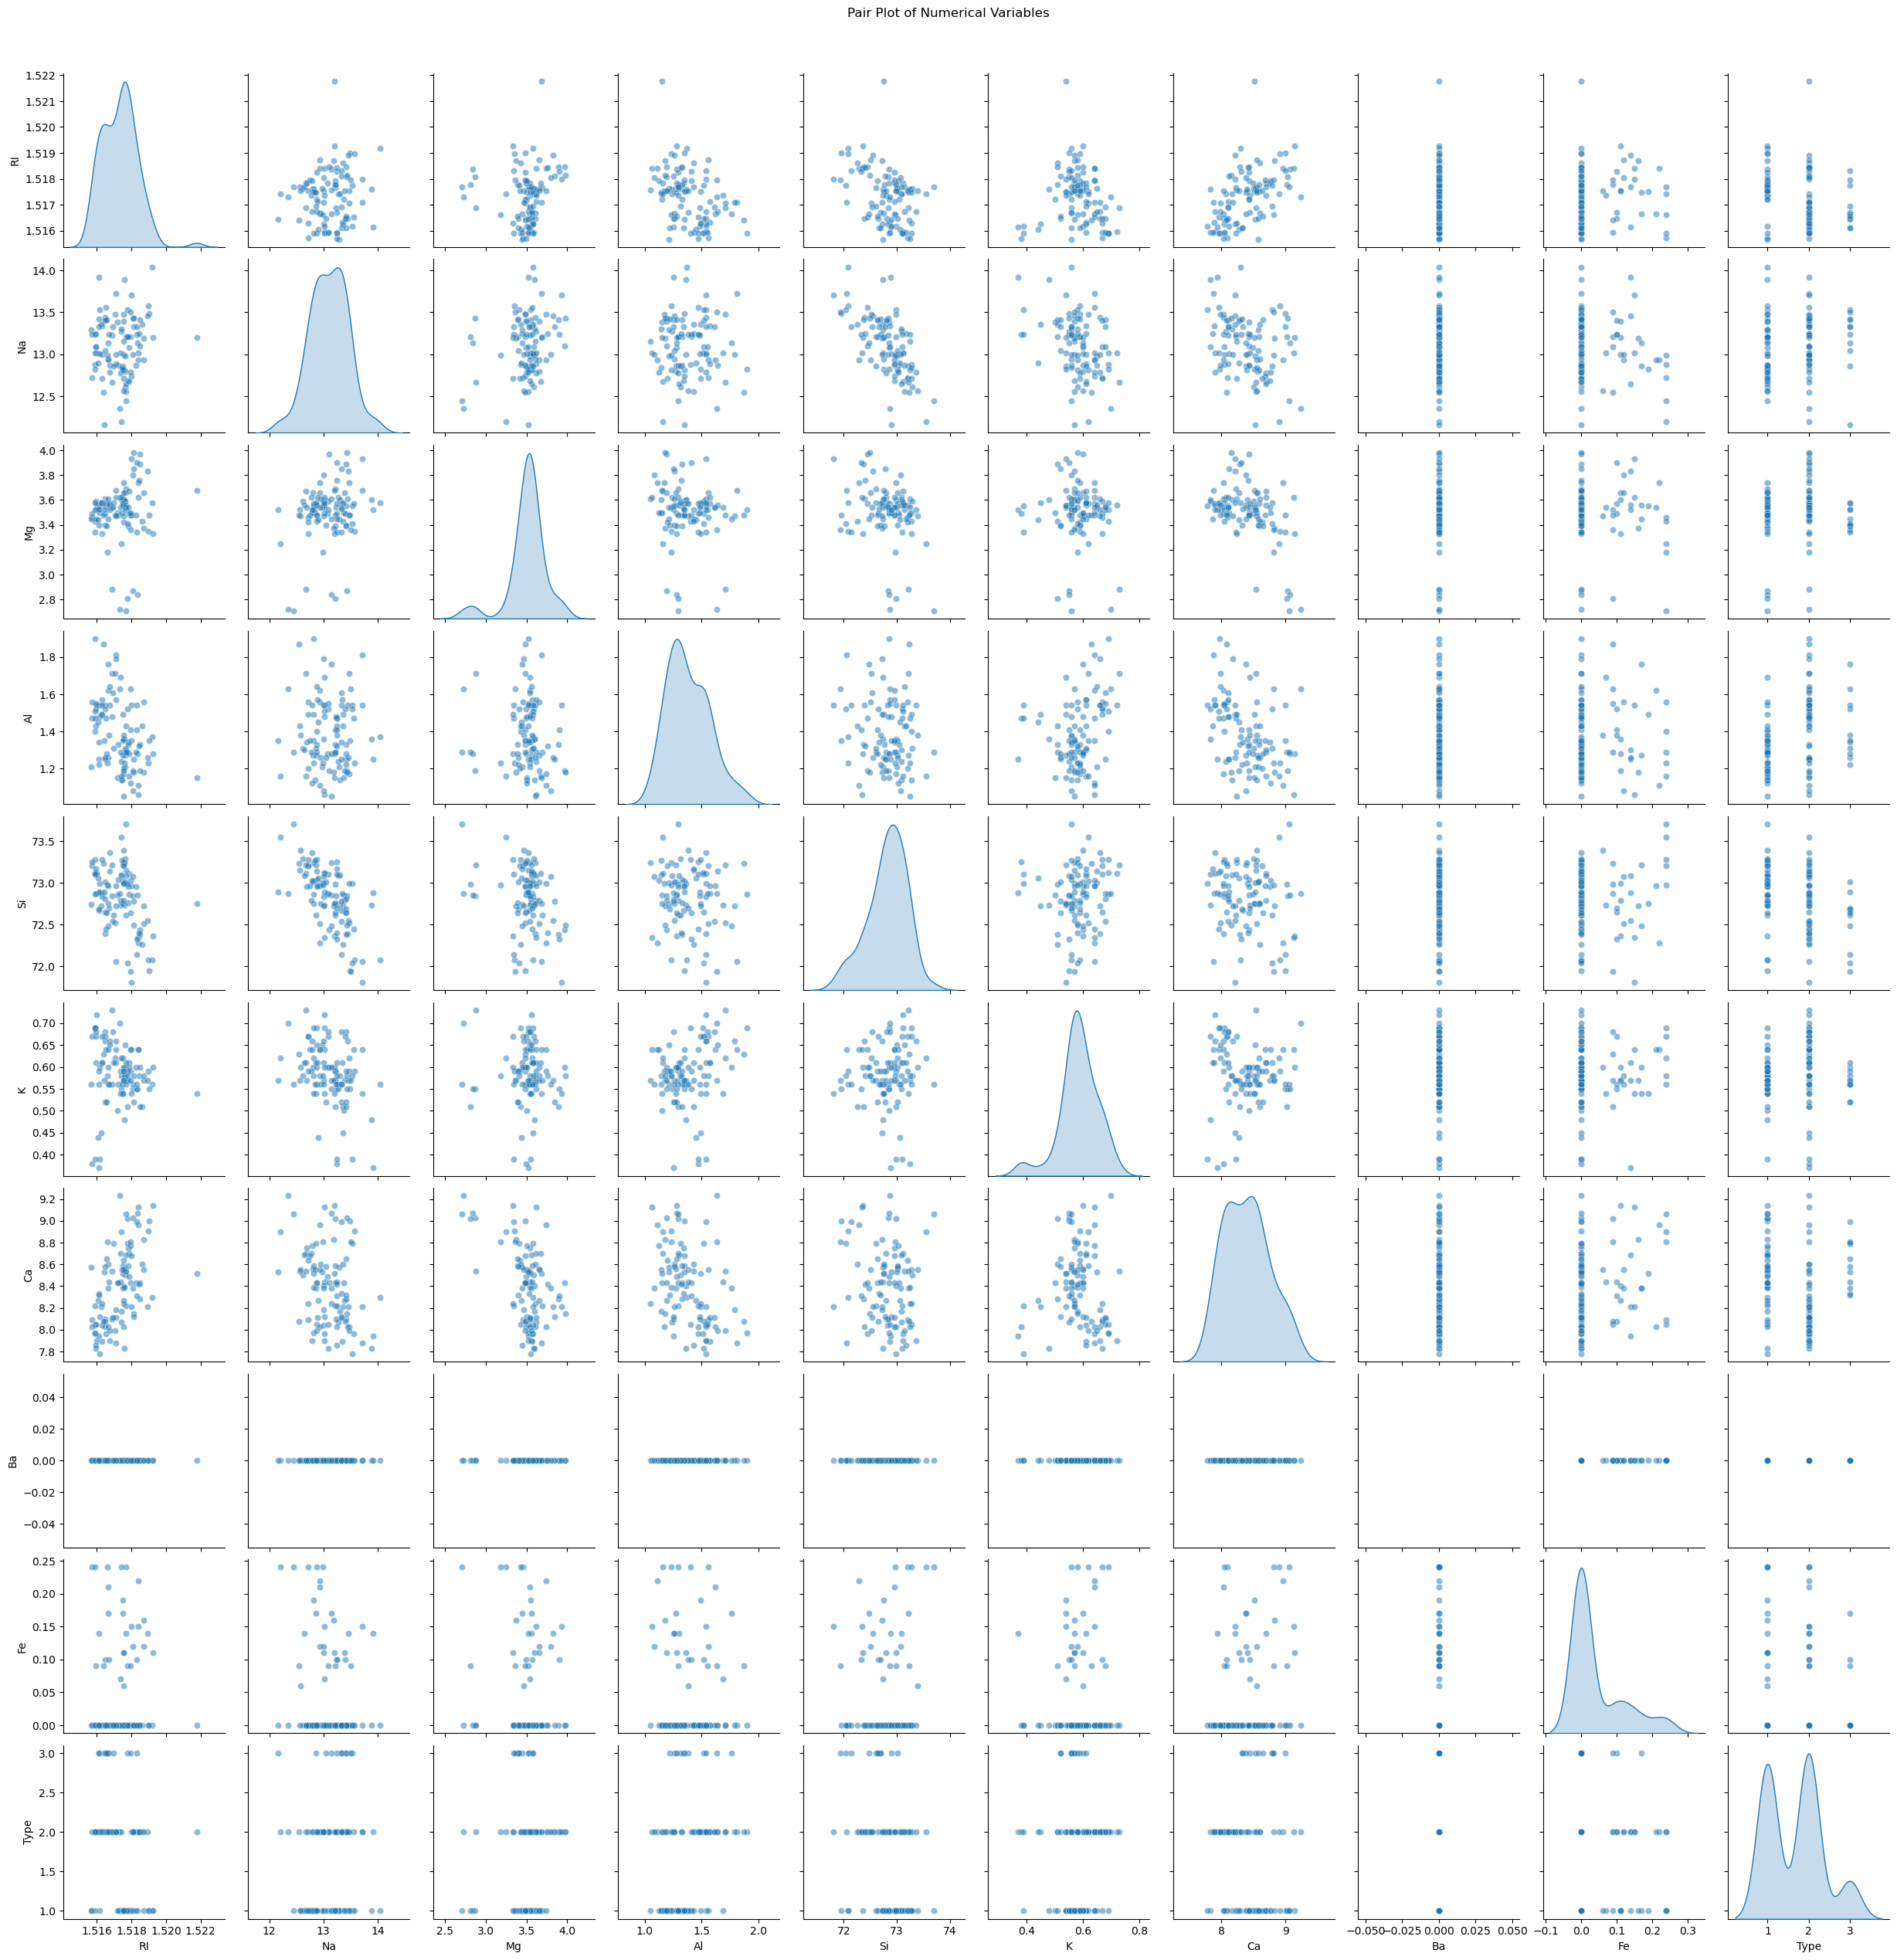

In [196]:
sns.pairplot(df[numeric_col], diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02) 
plt.show()

In [197]:
missing_summary = df.isnull().sum()
print(missing_summary)

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64


In [198]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables:", categorical_cols)

Categorical variables: Index([], dtype='object')


In [199]:
df_countable =df.drop('Type', axis=1)
df_countable

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09


In [200]:
# standardization 
from sklearn .preprocessing import StandardScaler 
SS = StandardScaler()
SS_X = SS.fit_transform(df_countable)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df_countable)
SS_X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.292266,2.265044,0.409689,-0.123542,-0.234911,-1.548993,-1.623524,0.0,-0.579856
1,-1.134714,1.234503,0.186612,0.848185,0.475602,-2.877917,-1.766445,0.0,-0.579856
2,0.342160,0.318466,0.811226,-0.501436,-0.562840,-0.220068,-0.508743,0.0,-0.579856
3,0.102667,0.490223,0.498919,-0.771360,0.721549,-0.515384,-0.937505,0.0,-0.579856
4,0.112646,0.576101,0.409689,-1.311208,0.748877,-0.072409,-0.651663,0.0,-0.579856
...,...,...,...,...,...,...,...,...,...
99,-0.855305,-0.168179,-0.482617,-0.663390,0.530257,-0.958359,0.520286,0.0,-0.579856
100,-0.765495,0.890989,-0.527233,-0.555421,-0.480858,-0.958359,0.720375,0.0,-0.579856
101,0.441949,1.234503,-0.438002,0.740215,-2.120503,-0.072409,1.120553,0.0,-0.579856
102,0.641527,1.148624,-0.661079,1.334048,-2.393777,-0.220068,1.177721,0.0,0.653655


In [201]:
type=df['Type']
type

1      1
2      1
3      1
4      1
6      1
      ..
155    3
156    3
158    3
159    3
160    3
Name: Type, Length: 104, dtype: int64

In [202]:
df_final= pd.concat([SS_X,type],axis=1)
df_final.shape

(138, 10)

In [203]:
df_final = df_final.fillna(0)
df_final

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.292266,2.265044,0.409689,-0.123542,-0.234911,-1.548993,-1.623524,0.0,-0.579856,0.0
1,-1.134714,1.234503,0.186612,0.848185,0.475602,-2.877917,-1.766445,0.0,-0.579856,1.0
2,0.342160,0.318466,0.811226,-0.501436,-0.562840,-0.220068,-0.508743,0.0,-0.579856,1.0
3,0.102667,0.490223,0.498919,-0.771360,0.721549,-0.515384,-0.937505,0.0,-0.579856,1.0
4,0.112646,0.576101,0.409689,-1.311208,0.748877,-0.072409,-0.651663,0.0,-0.579856,1.0
...,...,...,...,...,...,...,...,...,...,...
155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0


In [204]:
df_final.shape

(138, 10)

In [205]:
# data partition
Y = df_final["Type"]
X = df_final.drop(df_final[['Type']],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state=42, stratify=y)


In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [207]:
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=4,         
    random_state=42,
    bootstrap=True
)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)


print("Training Accuracy:", round(accuracy_score(y_train, y_pred_train), 3))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_test), 3))

print("\nPrecision (macro):", round(precision_score(y_test, y_pred_test, average='macro'), 3))
print("Recall (macro):", round(recall_score(y_test, y_pred_test, average='macro'), 3))
print("F1-score (macro):", round(f1_score(y_test, y_pred_test, average='macro'), 3))

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.891
Test Accuracy: 0.5

Precision (macro): 0.375
Recall (macro): 0.407
F1-score (macro): 0.39

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.57      0.53         7
         1.0       0.50      0.56      0.53         9
         2.0       0.50      0.50      0.50        10
         3.0       0.00      0.00      0.00         2

    accuracy                           0.50        28
   macro avg       0.38      0.41      0.39        28
weighted avg       0.46      0.50      0.48        28


Confusion Matrix:
 [[4 1 2 0]
 [3 5 1 0]
 [1 4 5 0]
 [0 0 2 0]]


C:\Users\RITHIKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RITHIKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RITHIKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RITHIKA\anaconda3\Lib\sit

In [209]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# -----------------------------
# Bagging Classifier (fixed)
# -----------------------------
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),   
    n_estimators=100,
    random_state=42,
    bootstrap=True
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

# -----------------------------
# AdaBoost Classifier
# -----------------------------
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# -----------------------------
# Gradient Boosting Classifier
# -----------------------------
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:" ,round(precision_score(y_true, y_pred, average='macro'), 3))
    print("Recall :", round(recall_score(y_true, y_pred, average='macro'), 3))
    print("F1-score :", round(f1_score(y_true, y_pred, average='macro'), 3))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# -----------------------------
# Compare Results
# -----------------------------
evaluate_model("Bagging", y_test, y_pred_bag)
evaluate_model("AdaBoost", y_test, y_pred_ada)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)


C:\Users\RITHIKA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Bagging Results:
Accuracy: 0.464
Precision: 0.346
Recall : 0.371
F1-score : 0.358

Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      0.43      0.43         7
         1.0       0.50      0.56      0.53         9
         2.0       0.45      0.50      0.48        10
         3.0       0.00      0.00      0.00         2

    accuracy                           0.46        28
   macro avg       0.35      0.37      0.36        28
weighted avg       0.43      0.46      0.45        28


AdaBoost Results:
Accuracy: 0.357
Precision: 0.089
Recall : 0.25
F1-score : 0.132

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.00      0.00      0.00         9
         2.0       0.36      1.00      0.53        10
         3.0       0.00      0.00      0.00         2

    accuracy                           0.36        28
   macro avg       0.09

C:\Users\RITHIKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RITHIKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RITHIKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RITHIKA\anaconda3\Lib\sit